In [1]:
import pandas as pd
import pickle

%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../model_code')
from kde import UnivariateKernelDensity

/Applications/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


# Data

In [2]:
# Read in the csv file.
data_pwt = pd.read_csv('pwt71_wo_country_names_wo_g_vars.csv')
data = data_pwt[['isocode', 'year', 'rgdpwok', 'POP']]

# Exclude official Chinese statistics from data set as corrected data is
# included as 'CH2'
data_pwt = data_pwt[data_pwt['isocode'] != 'CHN']
data = data[data['isocode'] != 'CHN']

# Restrict data to some specified years.
# years = list(range(1970, 2011))
years = [1970, 1980, 1990, 2000, 2010]
data = data[data['year'].isin(years)].dropna()

# Check which countries have entries for specified the years.
country_duplicates = {}
for country in data['isocode'].unique():
    country_duplicates[country] = (
        list(data['isocode']).count(country) == len(years)
    )

# Create list of the countries with entries for all specified years
countries = []
for country in sorted(country_duplicates.keys()):
    if country_duplicates[country] is True:
        countries.append(country)
    else:
        pass

print(
    'Number of countries with entries for all specified years:', len(countries)
)
# Restrict data to countries for which data is available for the specified
# years.
data = data[(data['isocode'].isin(countries) == True)]

# Calculate percentage of world population which is about 7.4 billion people
# and total numbeulerr of countries in the world which is 195.
pop_incl = sum(data[(data['year'] == 2010)]['POP'])
print('Share of total number of countries:', len(countries) / 195)
print('Percentage of world population:', pop_incl / 7400000)

Number of countries with entries for all specified years: 141
Share of total number of countries: 0.7230769230769231
Percentage of world population: 0.861184840541


# Analysis

In [3]:
# Specify bandwidth selection methods to be used in estimation.
bw_methods = ['lscv', 'silverman']

# Estimate the densities for the different years and bandwidth selection
# methods.
estimated_densities = {}

for year in years:
    # Create dictionary entry for year.
    estimated_densities[year] = {}

    # Restrict data to specified year.
    data_yearly = data[data['year'] == year].rgdpwok

    # Initialise the kernel density estimator.
    kde = UnivariateKernelDensity(data=data_yearly)

    for bandwidth in sorted(bw_methods):
        kde(bandwidth, stretch=2.9)

        # Save the estimated density and corresponding support in dictionary
        estimated_densities[year][bandwidth] = {
            'support': list(kde.support),
            'density': list(kde.estimated_density)
        }

# Visualisation

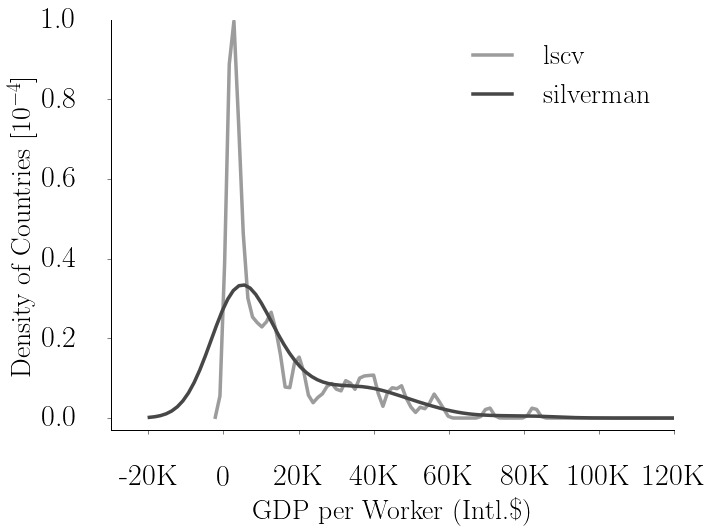

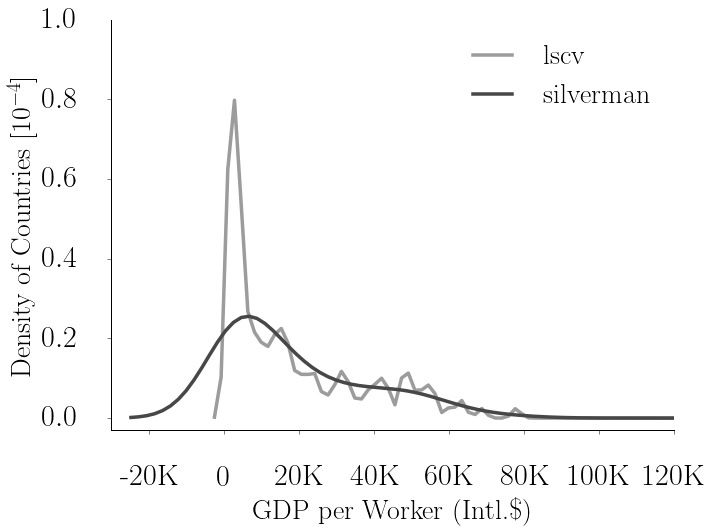

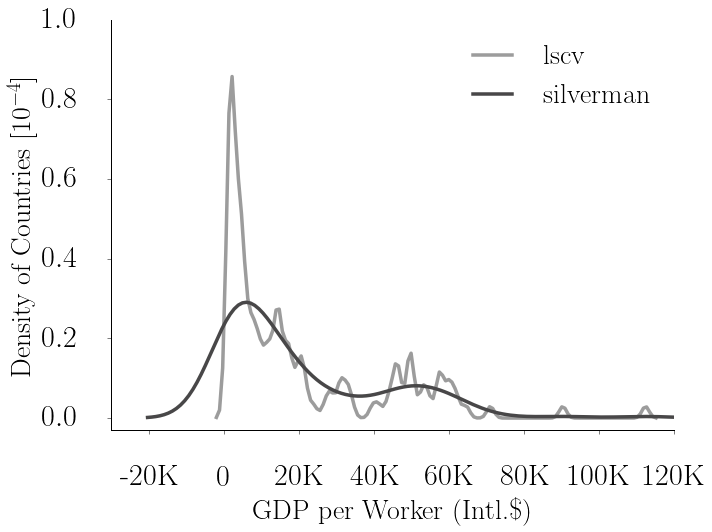

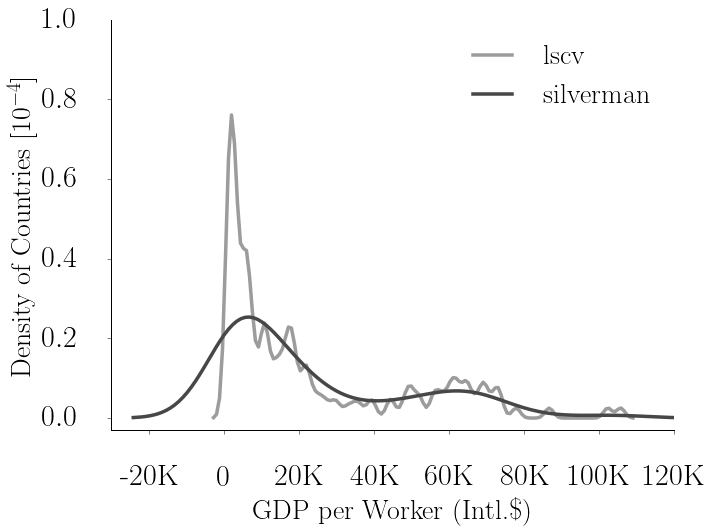

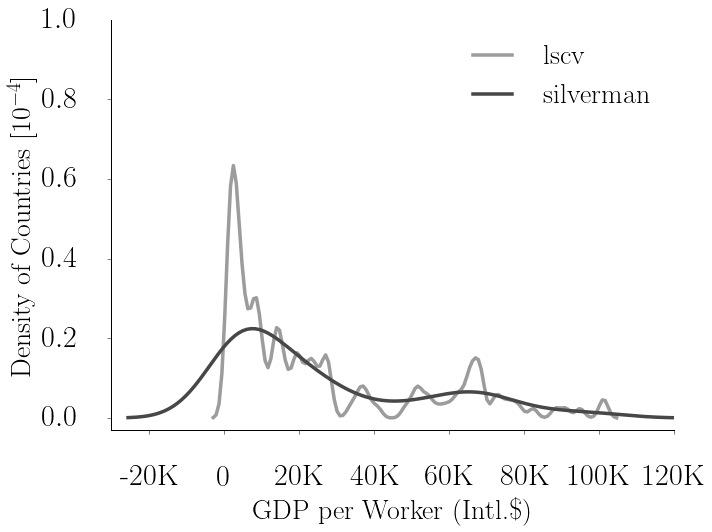

In [4]:
# Specify plot parameters.
plot_params = {
    'colour_bw': {'lscv': '#9C9C9C', 'silverman': '#484748'},
    'colour_bw_presentation': {'lscv': 'blue', 'silverman': 'black'},
    'figure_width': 10,
    'figure_height': 7.5,
    'font_size_labels': 28,
    'font_size_legend': 28,
    'font_size_ticks': 30,
    'line_width': 3.5,
    'title_size': 28
}

# Loop over all years and the specified bandwidth selection
# methods to plot estimated densities.
for year in sorted(estimated_densities.keys()):
    # Create figure.
    fig, ax = plt.subplots(
        figsize=(plot_params['figure_width'], plot_params['figure_height'])
    )

    for method in sorted(estimated_densities[year].keys()):
        # Use latex font.
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
        rc('text', usetex=True)

        # Create plot.
        ax.plot(
            estimated_densities[year][method]['support'],
            estimated_densities[year][method]['density'],
            color=plot_params['colour_bw'][method],
            label=method,
            linewidth=plot_params['line_width']
        )

        # Set axis limits.
        ax.set_xlim([-30000, 120000])
        ax.set_ylim([-0.000003, 0.0001])

        # Set axis labels.
        ax.set_xlabel(
            'GDP per Worker (Intl.\$)',
            fontsize=plot_params['font_size_labels']
        )
        ax.set_ylabel(
            'Density of Countries [$10^{{-4}}$]',
            fontsize=plot_params['font_size_labels']
        )

        # Set axis ticks and tick labels.
        plt.xticks(
            [-20000, 0, 20000, 40000, 60000, 80000, 100000, 120000],
            ['-20K', '0', '20K', '40K', '60K', '80K', '100K', '120K']
        )
        ax.tick_params(
            axis='x', labelsize=plot_params['font_size_ticks'], direction='out'
        )
        ax.tick_params(
            axis='y', labelsize=plot_params['font_size_ticks'], direction='out'
        )

        # Use scientific notation for y axis.
        yfm = ax.yaxis.get_major_formatter()
        yfm.set_powerlimits([-4, 4])
        offset = ax.get_yaxis().get_offset_text()
        offset.set_visible(False)

        # Remove frame.
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        # Add a legend.
        ax.legend(fontsize=plot_params['font_size_legend'], frameon=False)

        # Add a year as title.
        # plt.title(year, fontsize=plot_params['title_size'])

    # Remove whitespace around figure.
    plt.tight_layout()


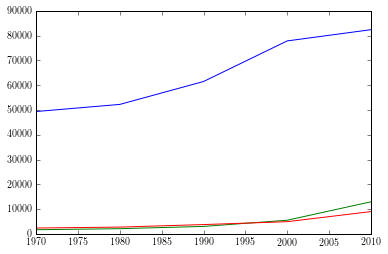

In [6]:
plt.plot(data[data['isocode'] == 'USA'].year, data[data['isocode'] == 'USA'].rgdpwok)
plt.plot(data[data['isocode'] == 'CH2'].year, data[data['isocode'] == 'CH2'].rgdpwok)
plt.plot(data[data['isocode'] == 'IND'].year, data[data['isocode'] == 'IND'].rgdpwok)

In [8]:
data[data['isocode'] == 'USA']

,isocode,year,rgdpwok,POP
11061,USA,1970,49363.46910,203984.000
11071,USA,1980,52233.25778,227224.681
11081,USA,1990,61463.31634,249622.814
11091,USA,2000,77834.66407,282171.957
11101,USA,2010,82359.26155,310232.863
